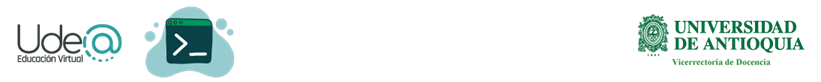

# <h1><center>Clustering Applications</center></h1>

**Especialización en Analítica de Datos**

*Prof. Hernán Felipe García Arias*

*Facultad de Ingeniería*

*Universidad de Antioquia*


**2025-1**


## Análisis de segmentación de clientes

¿Qué es la segmentación de clientes?

La segmentación de clientes es el proceso de dividir a los clientes en grupos según las características comunes para que las empresas puedan comercializar a cada grupo de manera más efectiva. El objetivo de segmentar a los clientes es decidir cómo relacionarse con los clientes en cada segmento para maximizar el valor de cada cliente para el negocio.

¿Por qué segmentar clientes?

La segmentación de clientes tiene el potencial de permitir que las compañías se dirijan a cada cliente de la manera más efectiva.
La segmentación ayuda a una empresa a crear y comunicar una estrategia de marketing dirigida que resonará con grupos específicos de clientes, lo que mejorará el servicio al cliente y establecerá mejores relaciones con los clientes.

¿Cómo segmentar a los clientes?

La segmentación de clientes requiere que una empresa recopile información específica (datos) sobre los clientes y la analice para identificar patrones que se pueden usar para crear segmentos.
Parte de eso se puede obtener de la información de compra: título del trabajo, geografía, productos comprados, etc.

Para esta demostración, consideremos un cliente hipotético de un Mall.
Cuando alguna vez un cliente solicitó una membresía para un cliente de un centro comercial. Se debe completar el formulario de membresía, del cual podemos obtener detalles como Nombre, Edad, Género, Ingreso anual, etc. y en función de la cantidad de veces que un cliente visita la tienda y cuánto gastan, se calcula una puntuación de gasto entre 1-100 para cada cliente.

La información típica incluye:
Identificación del cliente
Género
Años
Ingreso anual (k $)
Puntaje de gasto (1-100)

In [ ]:
!wget 'https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/8bd6144a87988213693754baaa13fb204933282d/Mall_Customers.csv' -O 'Mall_Customers.csv'

--2025-03-01 02:21:47--  https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/8bd6144a87988213693754baaa13fb204933282d/Mall_Customers.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3780 (3.7K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.69K  --.-KB/s    in 0s      

2025-03-01 02:21:47 (43.0 MB/s) - ‘Mall_Customers.csv’ saved [3780/3780]



Guide to encoding categorical variables
- https://pbpython.com/categorical-encoding.html

In [ ]:
# se importan las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
# se carga el dataset
dataset=pd.read_csv('Mall_Customers.csv')
dataset["Gender"] = dataset["Gender"].astype('category') # Asignamos la columna genre to categorical
dataset["Gender_cat"] = dataset["Gender"].cat.codes
dataset.drop(columns=['Gender'])

df=dataset.iloc[:,2:6]
#Features Matrix
X=df.values
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_cat
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


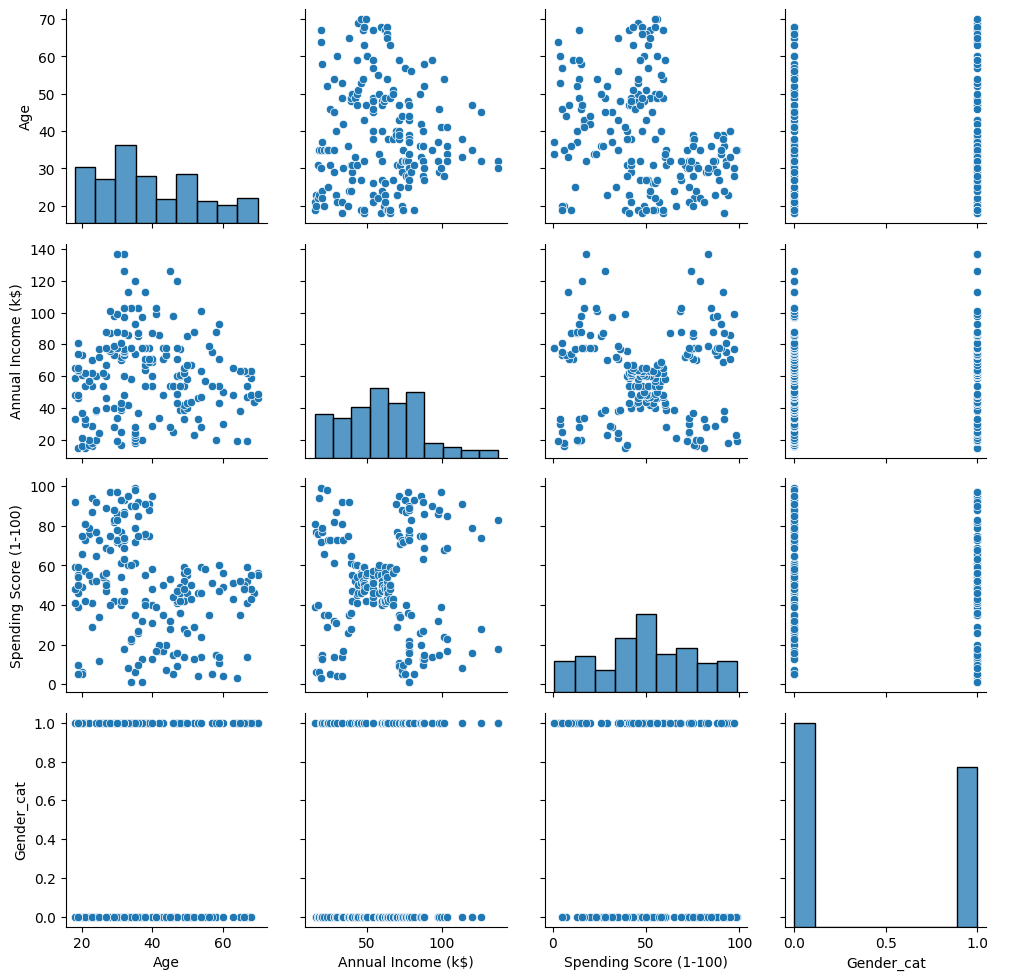

In [ ]:
import seaborn as sns

g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

Modelo de cluster con el algoritmo de Kmedias con 5 grupos

In [ ]:
from sklearn.cluster import KMeans
kmeans_1=KMeans(n_clusters=5)
kmeans_1.fit(X)
cluster_pred=kmeans_1.predict(X)
cluster_pred_2=kmeans_1.labels_
cluster_center=kmeans_1.cluster_centers_

Visualización

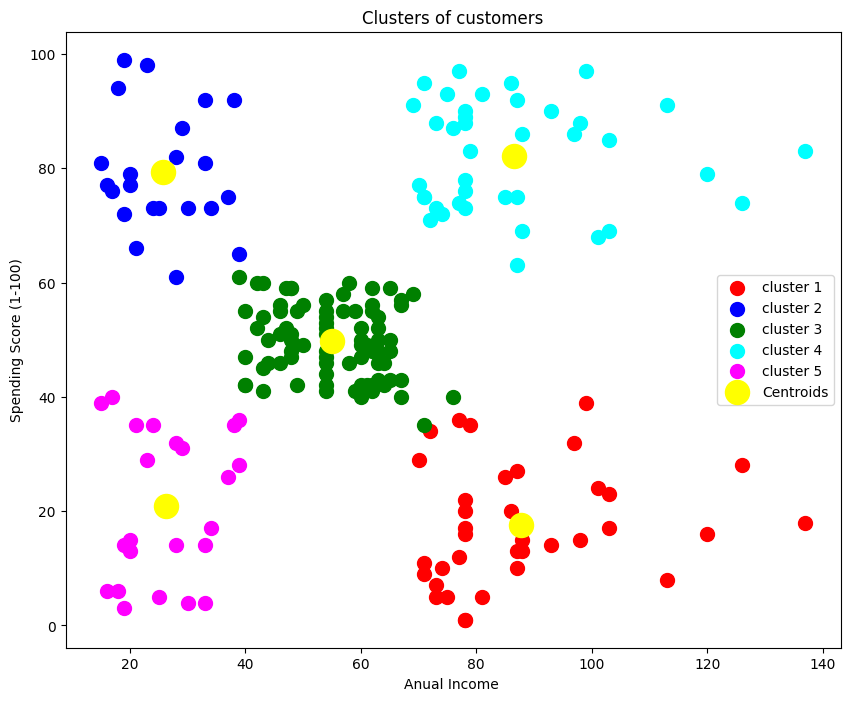

In [ ]:
# Visualising the clusters Ingreso vs Gasto  2D
plt.figure(figsize=(10,8))
plt.scatter(X[cluster_pred==0,1],X[cluster_pred==0,2], s = 100, c = 'red', label ='cluster 1' )
plt.scatter(X[cluster_pred==1,1],X[cluster_pred==1,2], s = 100, c = 'blue', label ='cluster 2' )
plt.scatter(X[cluster_pred==2,1],X[cluster_pred==2,2], s = 100, c = 'green', label ='cluster 3' )
plt.scatter(X[cluster_pred==3,1],X[cluster_pred==3,2], s = 100, c = 'cyan', label = 'cluster 4')
plt.scatter(X[cluster_pred==4,1],X[cluster_pred==4,2], s = 100, c = 'magenta', label = 'cluster 5')
plt.scatter(cluster_center[:,1],cluster_center[:,2], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Anual Income ')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
import plotly.graph_objects as go
# Define colors for clusters
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

# Create the 3D figure
fig = go.Figure()
num_clusters = 5  # Number of clusters
# Add scatter plots for each cluster
for i in range(num_clusters):
    fig.add_trace(go.Scatter3d(
        x=X[cluster_pred == i, 0],  # Age
        y=X[cluster_pred == i, 1],  # Annual Income
        z=X[cluster_pred == i, 2],  # Spending Score
        mode='markers',
        marker=dict(size=5, color=colors[i], opacity=0.8),
        name=f'Cluster {i+1}'
    ))

# Add centroids
fig.add_trace(go.Scatter3d(
    x=cluster_center[:, 0],
    y=cluster_center[:, 1],
    z=cluster_center[:, 2],
    mode='markers',
    marker=dict(size=8, color='yellow', symbol='x', opacity=1),
    name='Centroids'
))

# Update layout
fig.update_layout(
    title="Clusters of Customers (Interactive 3D)",
    scene=dict(
        xaxis_title="Age",
        yaxis_title="Annual Income (k$)",
        zaxis_title="Spending Score (1-100)"
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show interactive plot
fig.show()

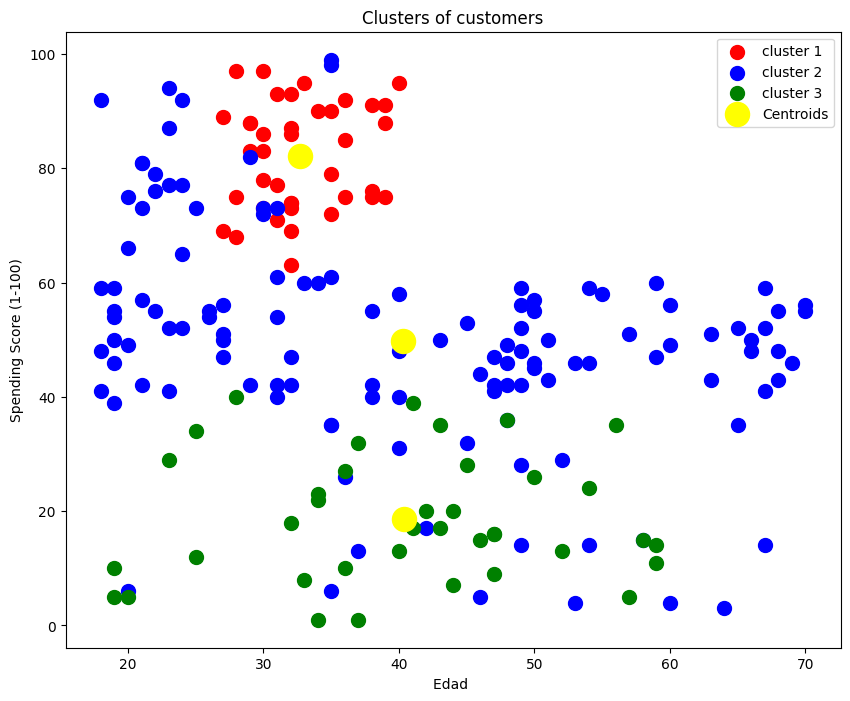

In [ ]:
from sklearn.cluster import KMeans
kmeans_1=KMeans(n_clusters=3)
kmeans_1.fit(X)
cluster_pred=kmeans_1.predict(X)
cluster_pred_2=kmeans_1.labels_
cluster_center=kmeans_1.cluster_centers_


# Visualising the clusters Edad vs Gasto
plt.figure(figsize=(10,8))
plt.scatter(X[cluster_pred==0,0],X[cluster_pred==0,2], s = 100, c = 'red', label ='cluster 1' )
plt.scatter(X[cluster_pred==1,0],X[cluster_pred==1,2], s = 100, c = 'blue', label ='cluster 2' )
plt.scatter(X[cluster_pred==2,0],X[cluster_pred==2,2], s = 100, c = 'green', label ='cluster 3' )
plt.scatter(cluster_center[:,0],cluster_center[:,2], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Edad ')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Visualizando los clusters:

El grupo con alto ingreso mensual y alto puntaje de gasto se puede llamar como **grupo objetivo**
de manera similar, el grupo con altos ingresos pero bajo puntaje de gasto puede llamarse **Grupo cuidadoso**
y el grupo con bajos ingresos y alto puntaje de gasto puede llamarse **grupo descuidado**
y el grupo con bajos ingresos y bajo puntaje de gasto puede llamarse **grupo sensible**
y uno que está en el medio es el **grupo estándar**.

Se ha dividido al cliente en 5 segmentos a saber:

1. cuidado
2. Estándar
3. Objetivo
4. Sensible
5. descuidado

¿Cómo ayudará esto?

Para una nueva oferta promocional, en lugar de llamar a cada cliente, primero nos centraremos en el grupo de clientes "objetivo".

Diferentes tipos de ofertas promocionales que se adaptan a diferentes grupos de clientes:
Por ejemplo, un sentido de la competencia para ganar un premio será adecuado para un tipo de grupo, mientras que comprar uno y obtener uno gratis será adecuado para otro grupo de clientes.

Con base en cada grupo de clientes podemos elegir diferentes estrategias de promoción.